# Direct Method to solve linear system
The aim is to solvea linear system of the form $Ax = b$ with the $det(A) \neq 0$ which means that $A$ is non-singular and we have a unique solution for each $b$. We can rewrite it
$$Ax =  b \leftrightarrow \sum_{j=1}^n a_{ij}x_j = b_i$$

### Cramer's rule
We can solve this system using the Cramer's rule if $A$ is non-singular. We can compute the unknown values in this way
$$x_i = \frac{det(B_i)}{det(A)}$$
where the matrix $B_i$ is a matrix $A$ with the $i-th$ column substitute by $b$.
In real application this method is not used since the computational cost is high. Every determinant requires $(n + 1)!$ operations.

### LU Factorization

#### Triangular Matrix
A Triangular Maatrix has values only on one side of the diagonal:
- Upper: $U = (u_{ij}) \rightarrow u_{ij} ) 0 \forall i, j: 1 \leq j < i \leq n$
- Lower: $L = (l_{ij}) \rightarrow l_{ij} ) 0 \forall i, j: 1 \leq i < j \leq n$

The diagonal of these matrix cannot be zero since $det(A) = \prod_{i = 1}^n \lambda_i(A)$ otherwise the $det(A) = 0$ and the matrix is singular.

#### Forward Substitution Method
If $L$ is a lower non-singular triangular matrix, the system $Ly = b$ can be solved with the forward subsitution method.

$$\begin{cases} l_{11} * y_1 & = b_1 \\ l_{11} * y_1 + l_{22} * y_2 & = b_2 \\ ... \\ l_{11} * y_1 + l_{22} * y_2 + ... + l_{nn} * y_n & = b_n \end{cases}$$

In this way we can start solving from the first equation $y_1 = \frac{b_1}{L_{11}}$, more in general we can use the recursive formula $$y_i = \frac{1}{l_{ii}} (b_i - \sum_{j=1}^{i-1}l_{ij}*y_j)$$

#### Backward Substitution Method
If $U$ is a upper non-singular triangular matrix, the system $Ux = y$ can be solved with the forward subsitution method.

$$\begin{cases} u_{11} * x_1 + ... + u_{1n-1} * x_{n-1} + u_{1n} * x_n & = y_1 \\ ... \\ u_{n-1,n-1} * x_{n-1} + u_{n-1,n}*x_n & = y_{n-1} \\ u_{nn}*x_n & = y_n \end{cases}$$

In this way we can start solving from the last equation $x_n = \frac{y_n}{u_{nn}}$, more in general we can use the recursive formula $$x_{i} = \frac{1}{u_{ii}} (y_i - \sum_{j=i + 1}^{n}u_{ij}*x_j)$$

#### LU Factorization
Now the aim is to find the decomposition of the matrix $A$ in the matrixes $LU$ to rewrite the system as
$$A = LU \Leftrightarrow Ax = b \Leftrightarrow LUx = b \Leftrightarrow \begin{cases} Ly = b \\ Ux = y \end{cases}$$

We can solve this system in $\theta(2 * n^2) \rightarrow \theta(n^2)$

### Gauss Elimination Method
This method transofrm $Ax=b$ in a system $Ux=\hat{b}$ with the same solution of the first one where:
- $U$ is an upper triangular matrix
- $\hat{b}$ is a properly modified second member<br>

The general idea is to keep the solution by adding linear combination.

- Let $A$ be an invertible $n*n$ Matrix with $a_{11} \ne 0$
- Introduce the multiplier $l_{i1} = \frac{a^{(1)}_{i1}}{a^{(1)}_{11}}, \qquad i = 2, ..., n$
- Second iteration $a^{(2)}_{ij} = a^{(1)}_{ij} - l_{ij}*a^{(1)}_{1j}, \qquad i,j = 2, ..., n$
- Second iteration $b^{(2)}_i = b^{(1)}_i - l_{ij} * b^{(1)}_1, \qquad i = 2, ..., n$

The general formula
$$l_{ik} = \frac{a^{(k)}_{ik}}{a^{(k)}_{kk}}, \qquad i = k + 1, ..., n$$
$$a^{(k + 1)}_{ij} = a^{(k))}_{ij} - l_{ik}*a^{(k)}_{kj}, \qquad i,j = k + 1, ..., n$$
$$b^{(k + 1)}_i = b^{(k)}_i - l_{ik} * b^{(k)}_k, \qquad i = k + 1, ..., n$$

If we do that for $n - 1$ time we obtain an upper triangular system in which each element of the diagonal is different from zero.

In [45]:
from numpy import *
import matplotlib.pyplot as plt
import sympy as sym

In [46]:
n = 25
h = 1 / (n - 1)
x = linspace(0, 1, n)

In [47]:
a = -ones((n - 1))
b = 2 * ones((n))

A = (diag(a, -1) + diag(b) + diag(a, 1)) * (1 / h**2)

# Boundary condition
A[0,:] = 0
A[:,0] = 0
A[0,0] = 1

A[-1,:] = 0
A[:,-1] = 0
A[-1,-1] = 1

In [48]:
f = x * (1 - x)
f[0] = 0
f[-1] = 0

In [49]:
A1 = A.copy()

u = linalg.solve(A1, f)
u_ex = x**4 / 12 - x**3 / 6 + x / 12

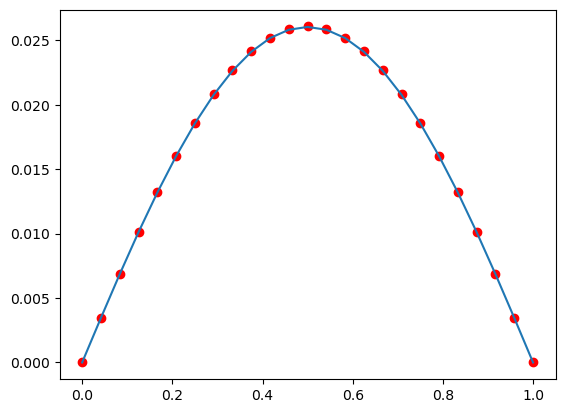

In [50]:
plt.plot(x, u, 'ro', label = 'DF')
plt.plot(x, u_ex, label = 'Exact')

In [51]:
def LU(A):
	N = len(A)
	U = A.copy()
	L = eye(N)
	P = eye(N)

	for i in range(N):
		"""
		for k in range(i, n): 
			if ~isclose(U[i, i], 0.0):
				break
			U[[k, k + 1]] = U[[k + 1, k]]
			P[[k, k + 1]] = P[[k + 1, k]]
		"""

		multiplier = U[i + 1:, i] / U[i, i]
		L[i + 1:, i] = multiplier
		U[i + 1:] -= multiplier[:, newaxis] * U[i]

	return P, L, U

P, L, U = LU(A)

In [52]:
def forward_substitution(L, b):
	N = len(L)

	y = zeros_like(b)
	
	y[0] = b[0] / L[0, 0]

	for i in range(N):
		y[i] = (b[i] - dot(L[i, :i], y[:i]))  / L[i, i]
	
	return y

def backward_substitution(U, y):
	N = len(L)
	
	x = zeros_like(y)

	x[-1] = y[-1] / U[-1, -1]

	for i in reversed(range(N - 1)):
		x[i] = (y[i] - dot(U[i, i:], x[i:])) / U[i, i]
	
	return x

In [53]:
def LU_solver(A, b):
	P, L, U = LU(A)
	y = forward_substitution(L, b)
	return backward_substitution(U, y)

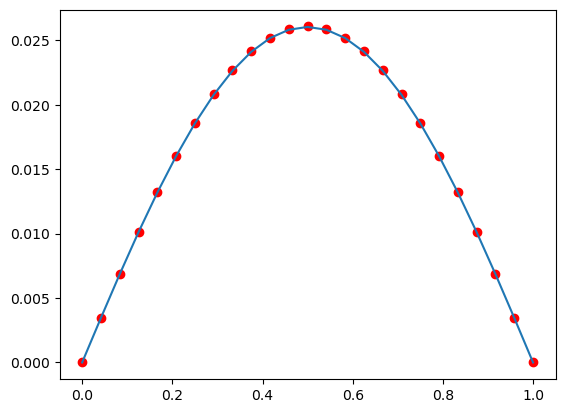

In [54]:
u = LU_solver(A, f)

plt.plot(x, u, 'ro', label = 'Computed')
plt.plot(x, u_ex, label = 'Exact')

In [55]:
def cholesky(A):
	A = A.copy()

	N = len(A)

	L = zeros((N, N))

	for k in range (N - 1):
		L[k, k] = sqrt(A[k, k] - sum(L[k, :] ** 2))
		L[k + 1:, k] = (A[k + 1:, k] - L[k + 1:, :] @ L[:, k]) / L[k, k]

	return L

#### Inverse with LU Factorization

In [62]:
A = array([[3, -0.1, -0.2], [0.1, 7, -0.3], [0.3, 0.2, 10]])

P, L, U = LU(A)
print(L)
print(U)
b = eye(len(A), len(A))

y = forward_substitution(L, b)
u = backward_substitution(U, y)
print(u)

[[1.         0.         0.        ]
 [0.03333333 1.         0.        ]
 [0.1        0.02998572 1.        ]]
[[ 3.         -0.1        -0.2       ]
 [ 0.          7.00333333 -0.29333333]
 [ 0.          0.         10.02879581]]
[[ 0.33250279  0.00455613  0.00678674]
 [-0.00517311  0.14266391  0.00417646]
 [-0.00987162 -0.00298996  0.09971287]]
